# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
#Type your code here
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


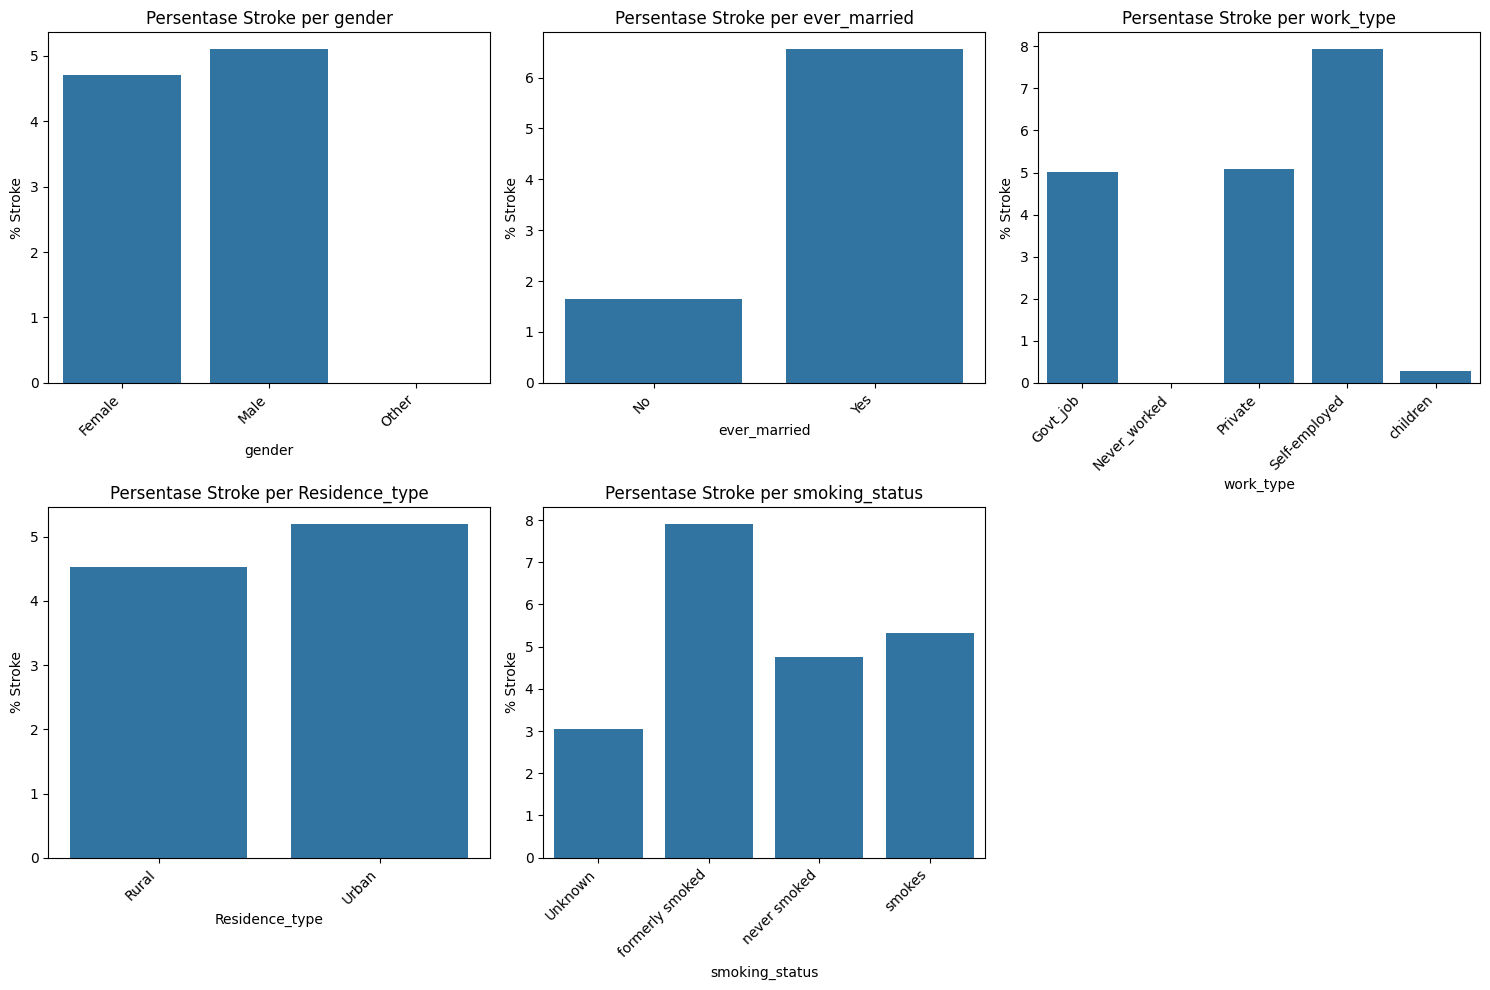

In [5]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    # Gunakan crosstab untuk melihat persentase stroke
    stroke_percentage = df.groupby(col)['stroke'].mean() * 100
    sns.barplot(x=stroke_percentage.index, y=stroke_percentage.values)
    plt.title(f'Persentase Stroke per {col}')
    plt.ylabel('% Stroke')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

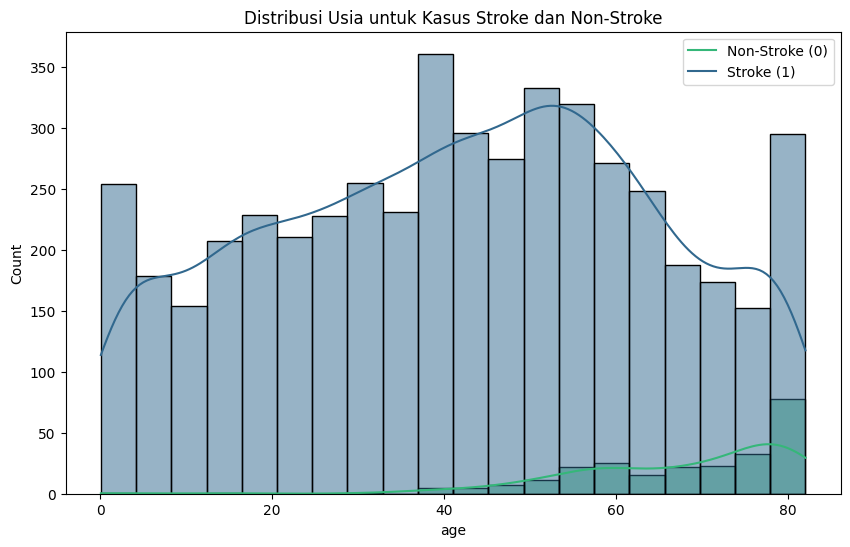

In [6]:
# Distribusi Usia untuk pasien Stroke vs. Non-Stroke
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='stroke', kde=True, palette='viridis')
plt.title('Distribusi Usia untuk Kasus Stroke dan Non-Stroke')
plt.legend(['Non-Stroke (0)', 'Stroke (1)'])
plt.show()

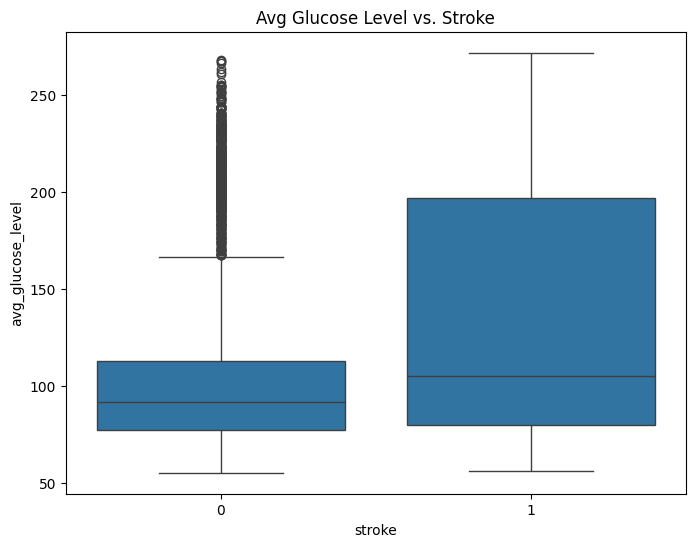

In [7]:
# Boxplot Tingkat Glukosa
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Avg Glucose Level vs. Stroke')
plt.show()

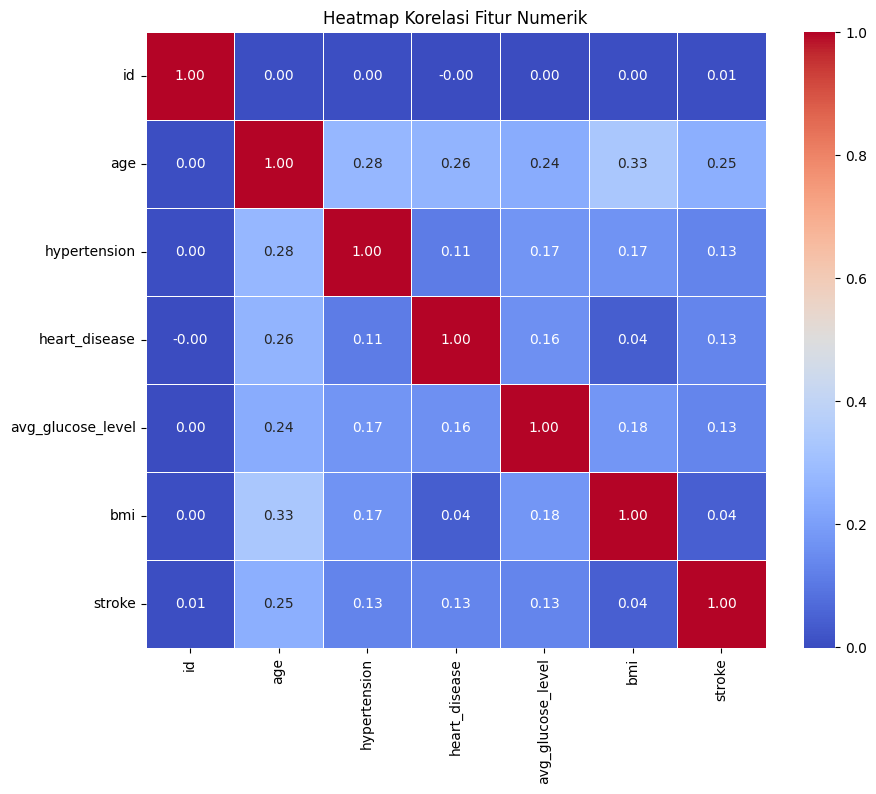

In [8]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

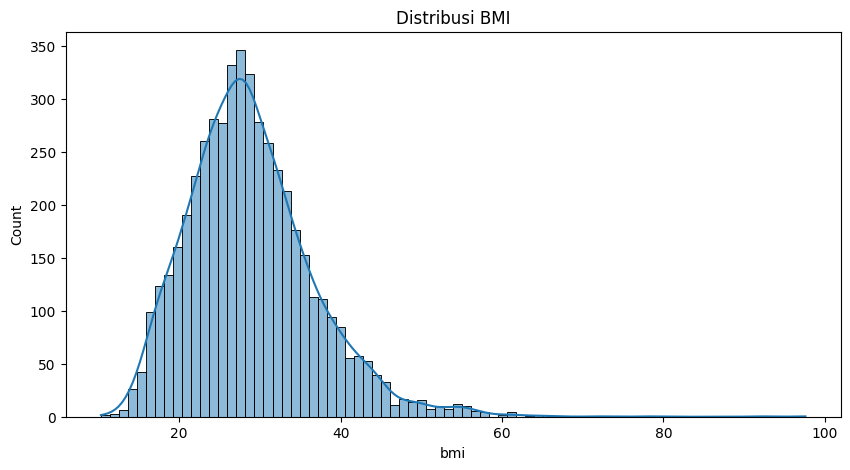

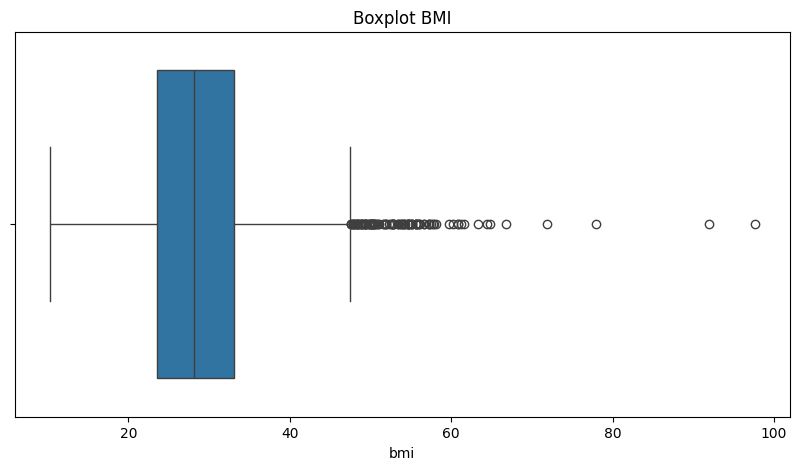

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['bmi'], kde=True)
plt.title('Distribusi BMI')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['bmi'])
plt.title('Boxplot BMI')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [11]:
bmi_median = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(bmi_median)
df.isnull().sum().sum()

np.int64(0)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df["gender"].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [14]:
df = df[df['gender'] != 'Other']

In [15]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

In [16]:
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True, dtype=int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5109 non-null   int64  
 1   gender                          5109 non-null   int64  
 2   age                             5109 non-null   float64
 3   hypertension                    5109 non-null   int64  
 4   heart_disease                   5109 non-null   int64  
 5   ever_married                    5109 non-null   int64  
 6   Residence_type                  5109 non-null   int64  
 7   avg_glucose_level               5109 non-null   float64
 8   bmi                             5109 non-null   float64
 9   stroke                          5109 non-null   int64  
 10  work_type_Never_worked          5109 non-null   int64  
 11  work_type_Private               5109 non-null   int64  
 12  work_type_Self-employed         5109 no

In [18]:
outlier_cols = ['avg_glucose_level', 'bmi']

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    # Lakukan Capping: Ganti nilai yang lebih besar dari batas atas dengan batas atas
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [19]:
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,0.413975,43.229986,0.097475,0.054022,0.656293,0.508123,100.988838,28.691642,0.048738,0.004306,0.572323,0.160305,0.134469,0.173028,0.370327,0.154433
std,21162.008804,0.492592,22.613575,0.296633,0.226084,0.474991,0.499983,33.214602,7.121011,0.215340,0.065486,0.494790,0.366925,0.341188,0.378308,0.482939,0.361399
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17740.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.240000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36922.000000,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.880000,28.100000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54643.000000,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,32.800000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,72940.000000,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,169.365000,46.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

numerical_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

X_train[numerical_cols].describe()

,age,avg_glucose_level,bmi
count,4.087000e+03,4.087000e+03,4.087000e+03
mean,-1.373449e-16,3.711790e-16,-2.781670e-17
std,1.000122e+00,1.000122e+00,1.000122e+00
min,-1.907260e+00,-1.387042e+00,-2.580200e+00
25%,-8.065280e-01,-7.125674e-01,-6.913418e-01
50%,7.688480e-02,-2.746973e-01,-8.044719e-02
75%,7.836150e-01,3.970472e-01,5.795998e-01
max,1.711198e+00,2.075423e+00,2.475480e+00


In [22]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=100
)

xgb_model.fit(X_train_smote, y_train_smote)

y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:08:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Setelah proses preprocessing selesai, kita akan menyimpan data yang telah dibersihkan ke dalam file CSV baru.

In [23]:
df.to_csv('healthcare-dataset-stroke-data_preprocessing.csv', index=False)
print("Data yang telah dibersihkan berhasil diekspor ke 'healthcare-dataset-stroke-data_cleaned.csv'")

Data yang telah dibersihkan berhasil diekspor ke 'healthcare-dataset-stroke-data_cleaned.csv'


In [24]:
print("\n--- Confusion Matrix (XGBoost) ---")
print(confusion_matrix(y_test, y_pred))

print("\n--- Classification Report (XGBoost) ---")
print(classification_report(y_test, y_pred))

print(f"\nAUC-ROC Score (XGBoost): {roc_auc_score(y_test, y_pred_proba):.4f}")


--- Confusion Matrix (XGBoost) ---
[[897  75]
 [ 41   9]]

--- Classification Report (XGBoost) ---
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       972
           1       0.11      0.18      0.13        50

    accuracy                           0.89      1022
   macro avg       0.53      0.55      0.54      1022
weighted avg       0.91      0.89      0.90      1022


AUC-ROC Score (XGBoost): 0.7763


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier

f1_scorer = make_scorer(f1_score, pos_label=1)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

# Inisialisasi model
rf_model_tuned = RandomForestClassifier(random_state=42)

# Inisialisasi Grid Search
grid_search_f1 = GridSearchCV(
    estimator=rf_model_tuned,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5,
    verbose=1
)

grid_search_f1.fit(X_train, y_train)

print(f"Parameter Terbaik (F1-Score): {grid_search_f1.best_params_}")
print(f"Nilai F1-Score Terbaik (Cross-Validation): {grid_search_f1.best_score_:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Parameter Terbaik (F1-Score): {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Nilai F1-Score Terbaik (Cross-Validation): 0.2181


In [26]:
from sklearn.metrics import f1_score
import numpy as np


best_rf_model_f1 = grid_search_f1.best_estimator_


y_pred_proba_final = best_rf_model_f1.predict_proba(X_test)[:, 1]


thresholds = np.linspace(0.1, 0.5, 50)
best_f1 = 0
best_threshold = 0.5

for t in thresholds:
    y_pred_t = (y_pred_proba_final >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t, pos_label=1)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Threshold Terbaik untuk F1-Score: {best_threshold:.4f}")
print(f"F1-Score Maksimum pada data Testing: {best_f1:.4f}")

Threshold Terbaik untuk F1-Score: 0.5000
F1-Score Maksimum pada data Testing: 0.2089


In [27]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import roc_auc_score


best_rf_model_f1 = grid_search_f1.best_estimator_

y_pred_proba_final = best_rf_model_f1.predict_proba(X_test)[:, 1]

final_threshold = 0.5000

y_pred_final = (y_pred_proba_final >= final_threshold).astype(int)

print("\n--- Model Terbaik (F1-Score Optimized) ---")
print(f"Parameter Terbaik: {grid_search_f1.best_params_}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba_final):.4f}")

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred_final))

print("\n--- Classification Report (Threshold=0.50) ---")
print(classification_report(y_test, y_pred_final))

print(f"\nF1-Score (Kelas 1) pada Data Testing: {f1_score(y_test, y_pred_final, pos_label=1):.4f}")


--- Model Terbaik (F1-Score Optimized) ---
Parameter Terbaik: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
AUC-ROC Score: 0.8268

--- Confusion Matrix ---
[[679 293]
 [ 10  40]]

--- Classification Report (Threshold=0.50) ---
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       972
           1       0.12      0.80      0.21        50

    accuracy                           0.70      1022
   macro avg       0.55      0.75      0.51      1022
weighted avg       0.94      0.70      0.79      1022


F1-Score (Kelas 1) pada Data Testing: 0.2089
